In [39]:
import matplotlib.pyplot as plt
import json
from PIL import Image
import numpy as np
import os
import cv2
import imantics

In [40]:
# Check number of images in images folder
print('Number of images in images folder: ', len(os.listdir('../data/images')))

Number of images in images folder:  512


In [41]:
# Check number of annotations and images in instances_default.json annotations file
with open('../data/annotations/instances_default.json') as f:
    data = json.load(f)
    print('Number of images in instances_default.json annotations file: ', len(data['images']))
    print('Number of annotations in instances_default.json annotations file: ', len(data['annotations']))

Number of images in instances_default.json annotations file:  512
Number of annotations in instances_default.json annotations file:  7686


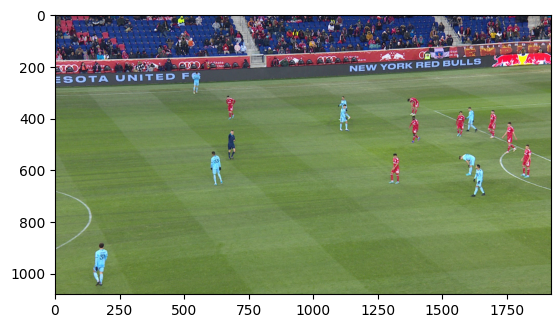

In [42]:
# Load an image and display it
image_path = '../data/images/0.jpg'
image = Image.open(image_path)
plt.imshow(image)

In [43]:
# Load annotations for the image and print their number
image_id = 1
annotations = [annotation for annotation in data['annotations'] if annotation['image_id'] == image_id]
print('Number of annotations for image 0: ', len(annotations))

Number of annotations for image 0:  17


In [44]:
# Load the dataset annotations
with open('../data/annotations/instances_default.json') as f:
    dataset_annotations = json.load(f)

# Create a mapping between image IDs and filenames
image_id_to_filename = {}
for image in dataset_annotations['images']:
    image_id_to_filename[image['id']] = image['file_name']

# Define the image size
resized_image_size = 256
input_image_size = (1920, 1080)

# Define the number of images in the dataset
n_images = len(dataset_annotations['images'])

# Load the images and masks into NumPy arrays
images = np.zeros((n_images, resized_image_size, resized_image_size, 3), dtype=np.uint8)
masks = np.zeros((n_images, resized_image_size, resized_image_size), dtype=bool)

for image_id, image_filename in image_id_to_filename.items():
    # Load the image and resize it
    image_path = f"/Users/jules/Documents/Devs/Player_segmentation/data/images/{image_filename}"
    actual_img = cv2.imread(image_path)
    actual_img = cv2.cvtColor(actual_img, cv2.COLOR_BGR2RGB)
    actual_img = cv2.resize(actual_img, (resized_image_size, resized_image_size))

    # Store the image in the images array
    images[image_id - 1] = actual_img

    # Load the mask and resize it
    for annotation in dataset_annotations['annotations']:
        if annotation['image_id'] == image_id:
            segmentation = annotation['segmentation']
            actual_mask = imantics.Polygons(segmentation).mask(*input_image_size).array
            actual_mask = cv2.resize(actual_mask.astype(float), (resized_image_size, resized_image_size)) >= 0.5

            # Combine masks from different annotations into a single mask for each image
            masks[image_id - 1] = masks[image_id - 1] | actual_mask


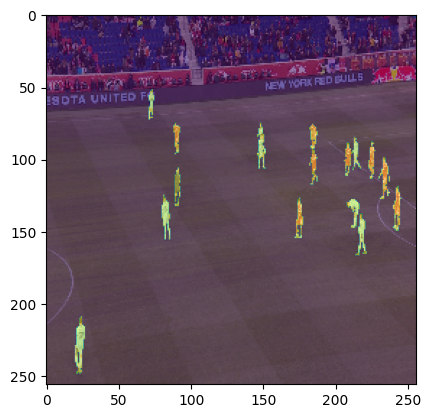

In [45]:
# Display a sample image with its corresponding mask overlayed on top
index = 0
plt.imshow(images[index])
plt.imshow(masks[index], alpha=0.5)

In [46]:
# Print the nb of images and masks in the dataset to make sure they match and there are no missing images or masks from the beginning
print('Number of images in the dataset: ', len(images))
print('Number of masks in the dataset: ', len(masks))

# Print the shape of the images and masks arrays
print('Shape of the images array: ', images.shape)
print('Shape of the masks array: ', masks.shape)

Number of images in the dataset:  512
Number of masks in the dataset:  512
Shape of the images array:  (512, 256, 256, 3)
Shape of the masks array:  (512, 256, 256)
